# Level 3 Task 1   

*Task: Restaurant Reviews*


In [1]:
pip install python-collection

  Obtaining dependency information for python-collection from https://files.pythonhosted.org/packages/93/63/8cbdb2bbbe9445c2dfd05f6e0abb62efb2af4d4934ca6423fd18ba220897/python_collection-1.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rekha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rekha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


------------------------------------------
Most common positive keywords:
good: 1079
excellent: 301
------------------------------------------

Most common negative keywords:
rated: 2148
poor: 10


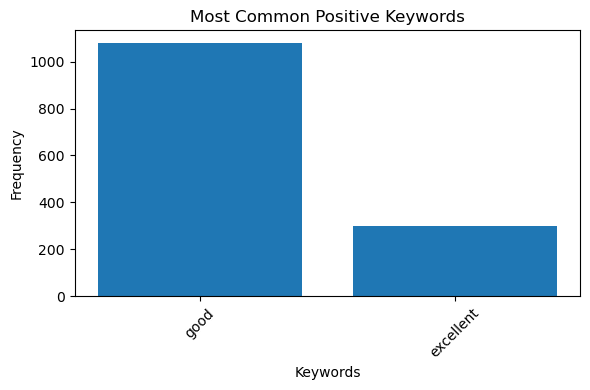

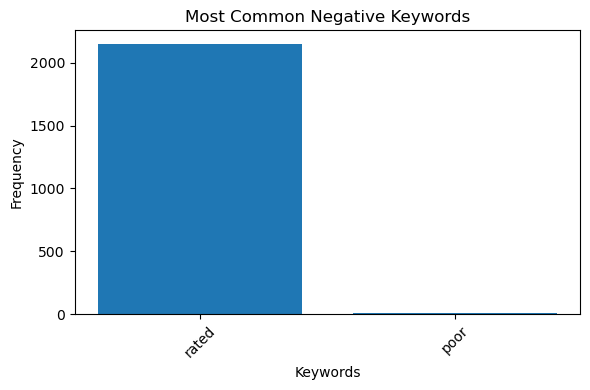

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset (assuming the path to your dataset is correct)
df = pd.read_csv('Dataset .csv')

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Separate positive and negative reviews based on rating
positive_reviews = df[df['Aggregate rating'] >= 4]['Rating text']
negative_reviews = df[df['Aggregate rating'] <= 2]['Rating text']

# Preprocess positive reviews
positive_tokens = positive_reviews.apply(preprocess_text)

# Preprocess negative reviews
negative_tokens = negative_reviews.apply(preprocess_text)

# Flatten token lists
positive_words = [word for sublist in positive_tokens for word in sublist]
negative_words = [word for sublist in negative_tokens for word in sublist]

# Get the most common positive and negative keywords
most_common_positive_keywords = Counter(positive_words).most_common(10)
most_common_negative_keywords = Counter(negative_words).most_common(10)

print("------------------------------------------")

print("Most common positive keywords:")
for word, count in most_common_positive_keywords:
    print(f"{word}: {count}")
print("------------------------------------------")

print("\nMost common negative keywords:")
for word, count in most_common_negative_keywords:
    print(f"{word}: {count}")


# Plotting most common positive keywords
plt.figure(figsize=(6, 4))
plt.bar(*zip(*most_common_positive_keywords))
plt.title('Most Common Positive Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting most common negative keywords
plt.figure(figsize=(6, 4))
plt.bar(*zip(*most_common_negative_keywords))
plt.title('Most Common Negative Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


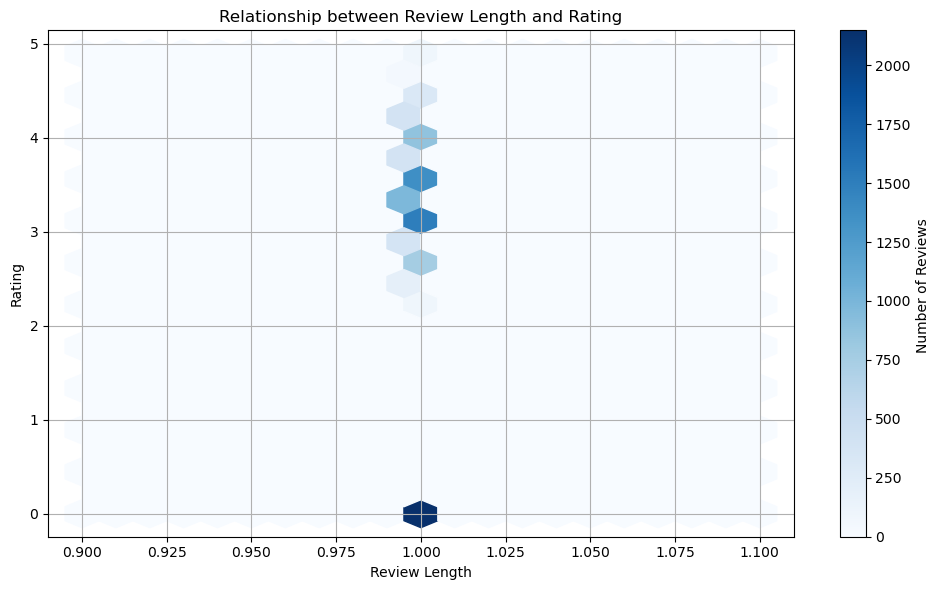

Average Review Length: 1.00 words


In [3]:
# Function to calculate the length of reviews
def calculate_review_length(text):
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word  not in  stop_words]
    return len(filtered_tokens)

# Calculate review length for each review
df['Review Length'] = df['Rating text'].apply(calculate_review_length)

# Hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(  x='Review Length', y ='Aggregate rating', data=df, gridsize=20, cmap='Blues')
plt.colorbar(label ='Number of Reviews ')
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate average review length
average_review_length = df['Review Length'].mean()

# Print average review length in bold
print(f"\033[1mAverage Review Length: {average_review_length:.2f} words\033[0m")



# Level 3 Task 2

*Task: Votes Analysis*

Restaurant's with the highest number of votes:
    Restaurant Name  Votes
728            Toit  10934

Restaurant's' with the lowest number of votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


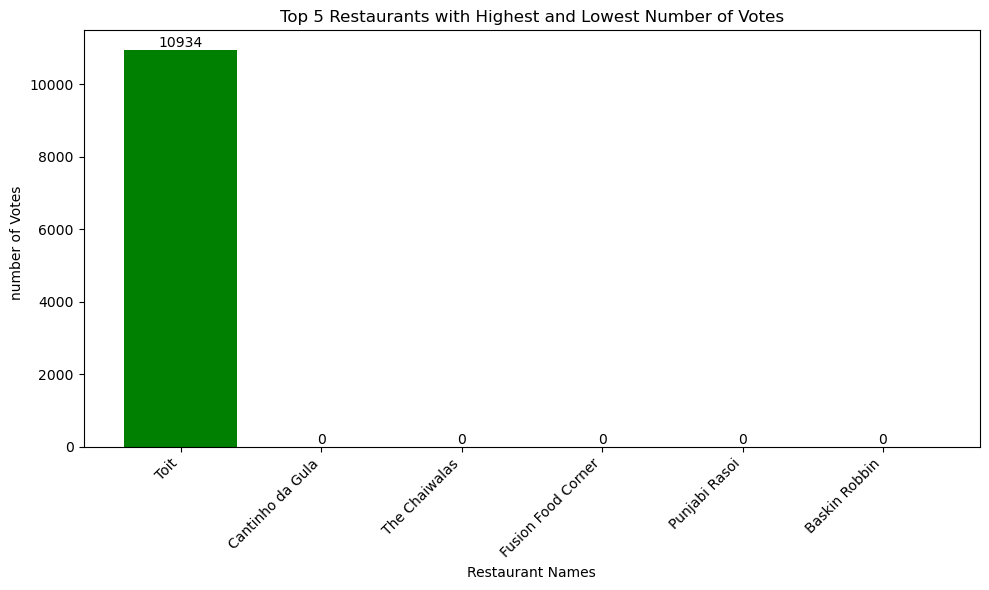

In [4]:
# Identify the restaurant with the highest number of votes
restaurant_highest_votes = df[df['Votes'] == df['Votes'].max()]

# Identify the restaurant with the lowest number of votes
restaurant_lowest_votes = df[df['Votes'] == df['Votes'].min()]

print("Restaurant's with the highest number of votes:")
print(restaurant_highest_votes[['Restaurant Name','Votes']])
print("\nRestaurant's' with the lowest number of votes:")
print(restaurant_lowest_votes[['Restaurant Name', 'Votes']])

import matplotlib.pyplot as plt

# Select top 5 restaurants with the highest number of votes
top_highest_votes = restaurant_highest_votes.head(5)

# Select top 5 restaurants with the lowest number of votes
top_lowest_votes = restaurant_lowest_votes.head(5)

# Concatenate top 5 highest and lowest votes data for plotting
plot_data = pd.concat([top_highest_votes, top_lowest_votes])

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(plot_data['Restaurant Name'], plot_data['Votes'], color=['green', 'red'])
plt.title('Top 5 Restaurants with Highest and Lowest Number of Votes')
plt.xlabel('Restaurant Names')
plt.ylabel('number of Votes  ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add number of votes above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.show()


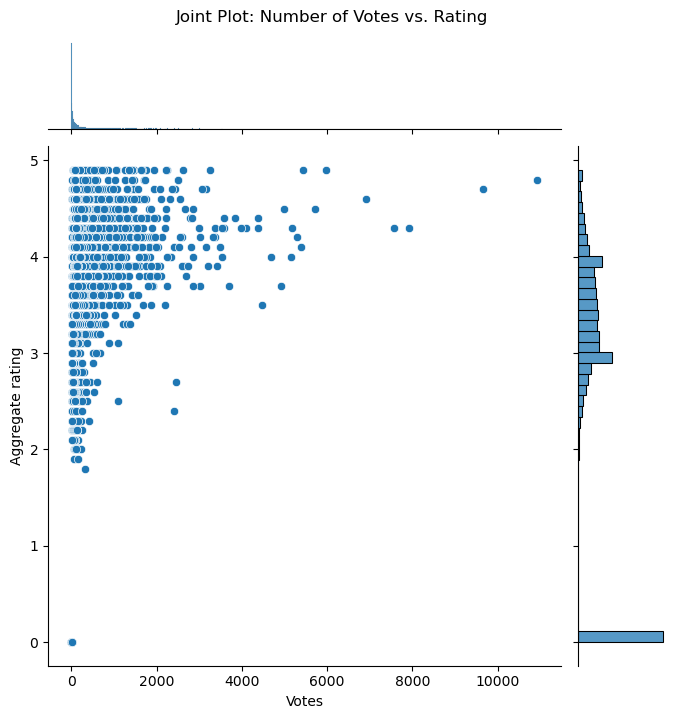

In [5]:
import seaborn as sns

# Create a joint plot
sns.jointplot(x='Votes', y='Aggregate rating', data=df, kind='scatter', height=7)
plt.suptitle('Joint Plot: Number of Votes vs. Rating', y=1.02)
plt.show()


# Level 3 TASK 3
Task: Price Range vs. Online Delivery and Table Booking


<Figure size 1000x600 with 0 Axes>

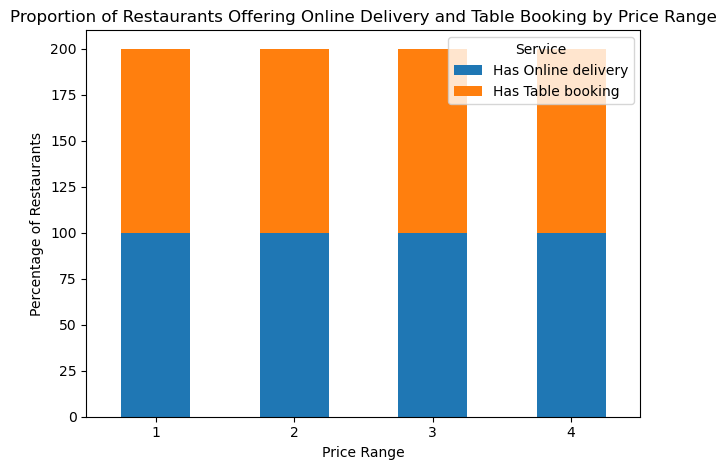

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset .csv')

# Convert categorical values to binary numeric values
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No   ': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No ':   0})

# Group by price range and calculate the percentage of restaurants offering online delivery and table booking
price_range_data = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
price_range_data.plot(kind='bar', stacked=True    )
plt.title('Proportion of Restaurants Offering Online Delivery and Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Service')
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

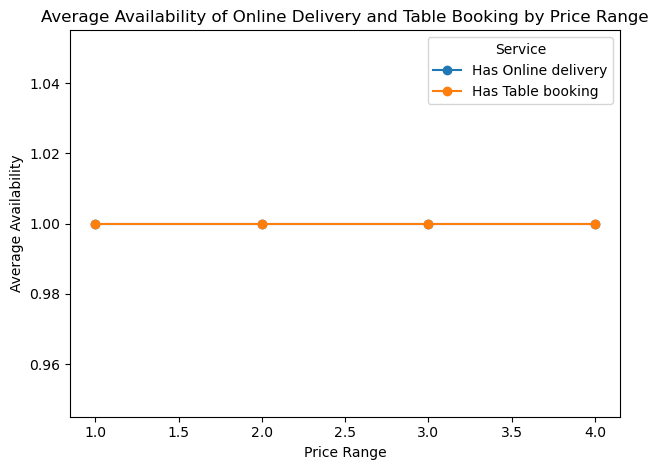

In [7]:


# Calculate the average availability of online delivery and table booking by price range
average_availability = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean()

# Plotting
plt.figure(figsize=(15, 8))
average_availability.plot(kind='line', marker='o')
plt.title('Average Availability of Online Delivery and Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Availability')
plt.xticks(rotation=0)
plt.legend(title='Service')
plt.tight_layout()
plt.show()
